# Multiple Linear Regression in Python

Welcome to the session on ‘Multiple Linear Regression in Python’. In the last session, you learnt about the various theoretical aspects of multiple linear regression. Now, let’s move on to building a multiple linear regression model in Python.

In this session
You will learn the generic steps that are required to build a multiple linear regression model. You will build this model for a **housing dataset** and **predict the price** of a house using the various potential predictor variables provided. You will first read and visualise your dataset and then prepare your data for building a linear model. This will include 

* dealing with categorical variables
* adding dummy variables,
* and scaling.
* You will then start building the model with a bottom-up approach, i.e., you will start with one variable and keep on adding more.
* Once all the variables have been added, you will perform a manual feature elimination
* and move on to the residual analysis and predictions, as usual.
* In the end, you will solve the same problem using RFE.

# Reading and Understanding the Data

Linear regression is used in various fields such as real estate, telecom, e-commerce, etc. to build predictive models. Let's look at one such example from the real estate industry. Here, you will **predict the price** of a house on the basis of some predictor variables, such as floor area, number of bedrooms, parking space, etc.



**Problem Statement:**

Consider that a real estate company has the data of real estate prices in Delhi. The company wants to optimise the selling price of the properties, based on important factors such as area, bedrooms, parking, etc.


**Essentially, the company wants:**

* To identify the variables affecting house prices, e.g., area, number of rooms, bathrooms, etc.
* To create a linear model that quantitatively relates house prices with variables, such as the number of rooms, area, number of bathrooms, etc.
* To know the accuracy of the model, i.e. how well do these variables predict the house prices
  
Please find the Housing dataset [here](https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression/Multiple+Linear+Regression+in+Python/Housing.csv) and the Multiple Linear Regression notebook [here](https://github.com/ContentUpgrad/Linear-Regression/tree/main/Multiple%20Linear%20Regression%20in%20Python).

In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
import statsmodels.api as sm

#for test
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Step 1: Reading and Understanding the Data

In [2]:
#Reading the data 
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# target variable is price
# rest all are predictor variable
# mostly preditors are catagorical variables

In [4]:
#check shape
housing.shape

(545, 13)

In [5]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
#chek null values
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

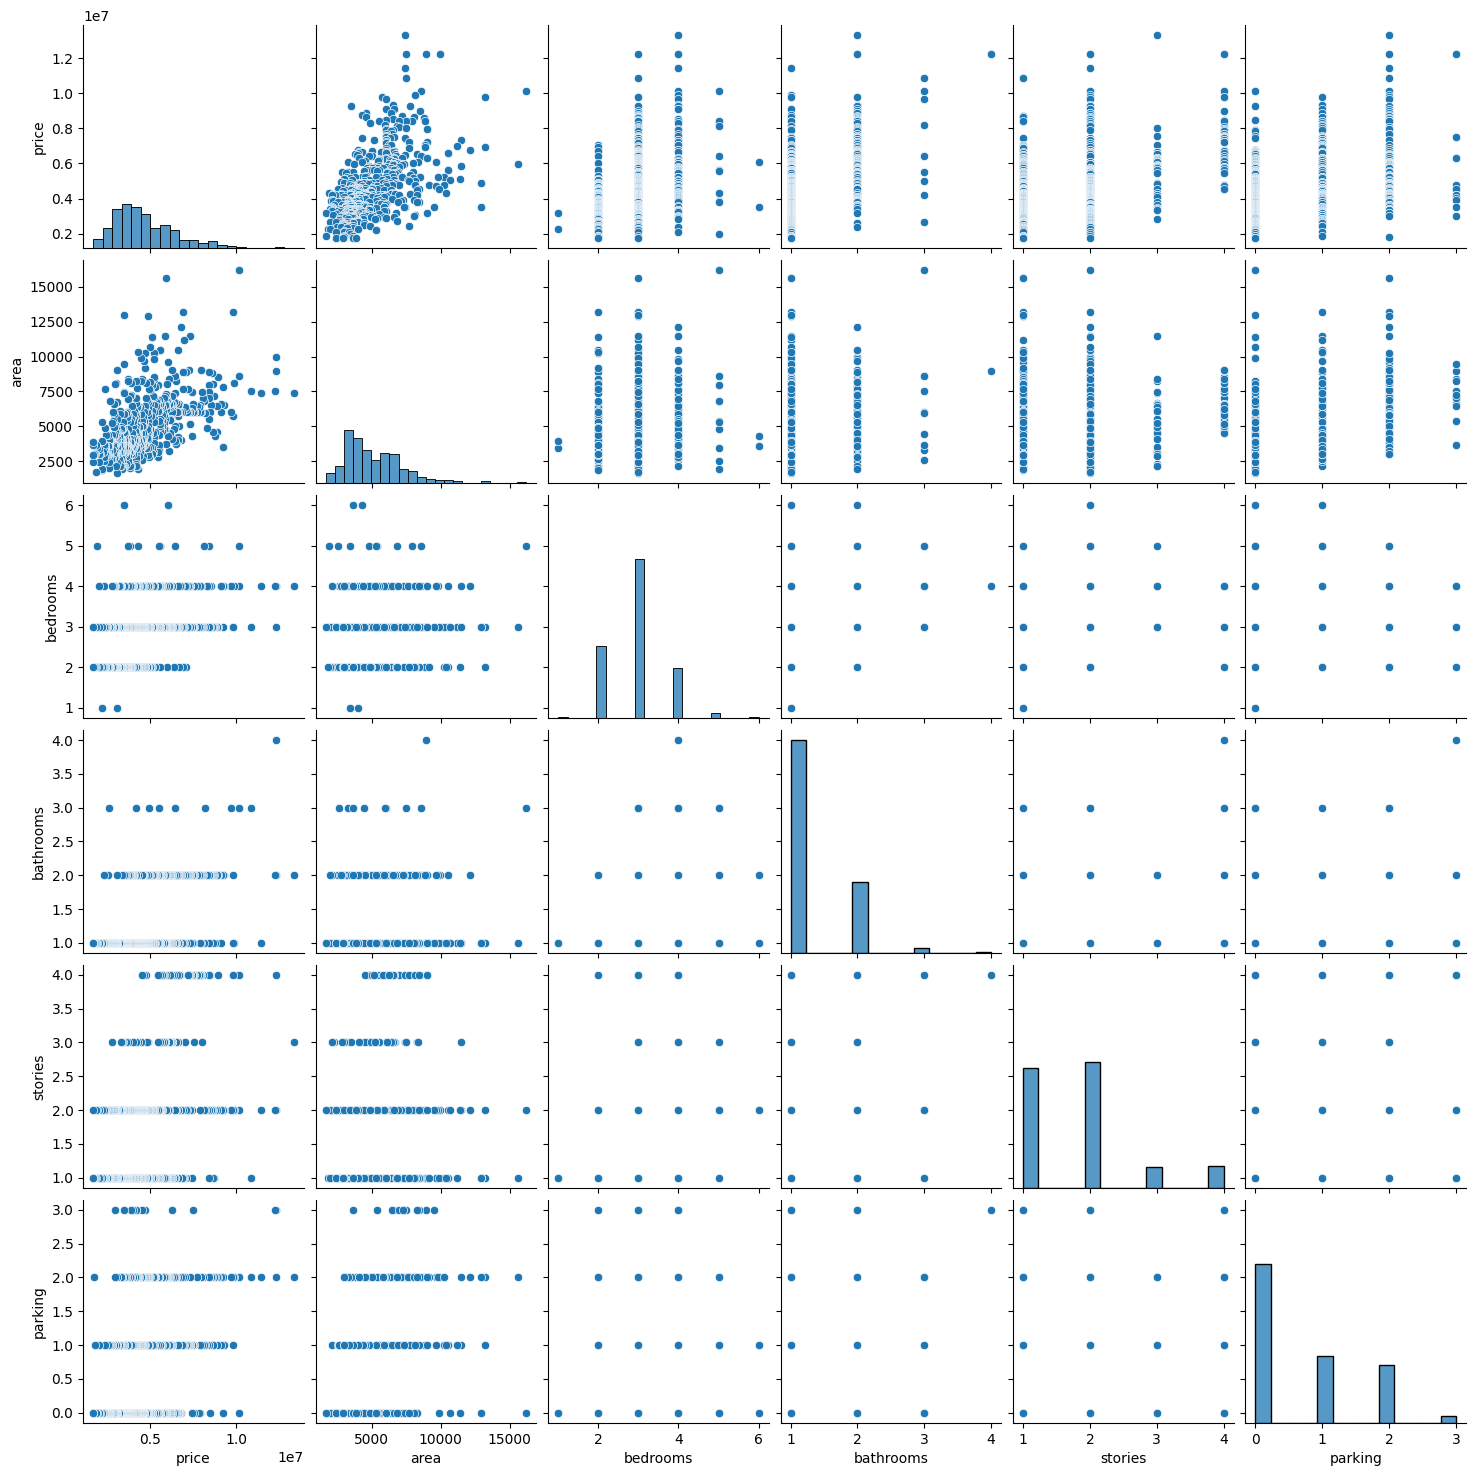

In [8]:
#visualising the numerical variables
sns.pairplot(housing)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

#### subplot

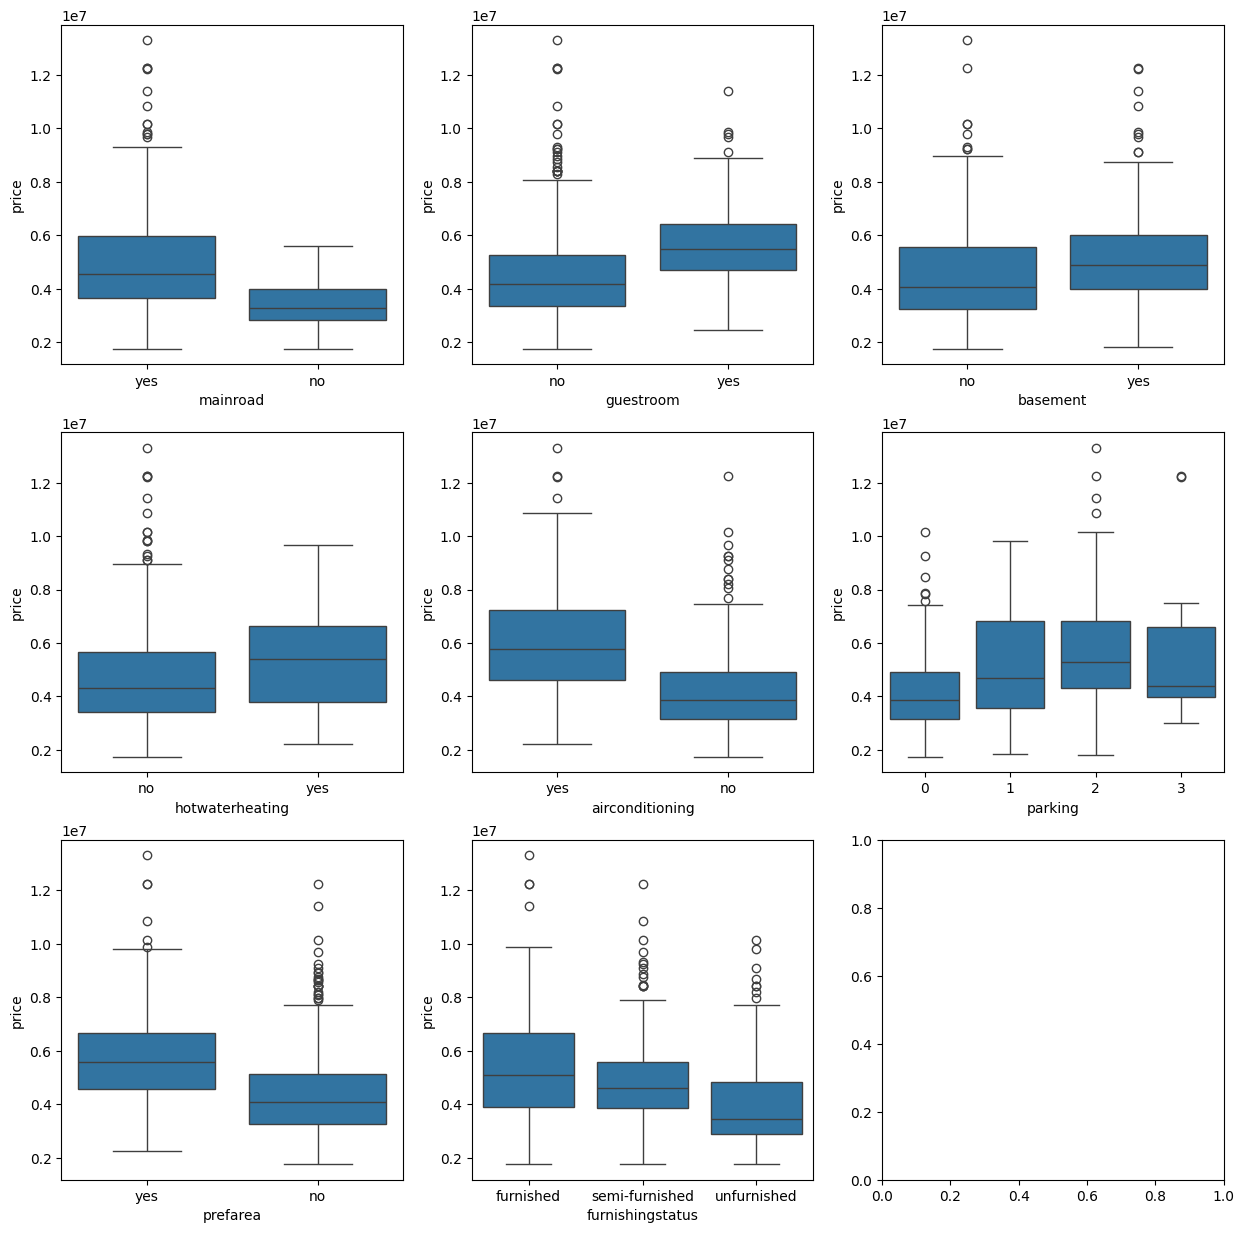

In [9]:
#catagotical variables:  mainroad	guestroom	basement	hotwaterheating	airconditioning	parking	prefarea	furnishingstatus
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(housing, x = 'mainroad', y = 'price')
plt.subplot(3,3,2)
sns.boxplot(housing, x = 'guestroom', y = 'price')
plt.subplot(3,3,3)
sns.boxplot(housing, x = 'basement', y = 'price')
plt.subplot(3,3,4)
sns.boxplot(housing, x = 'hotwaterheating', y = 'price')
plt.subplot(3,3,5)
sns.boxplot(housing, x = 'airconditioning', y = 'price')
plt.subplot(3,3,6)
sns.boxplot(housing, x = 'parking', y = 'price')
plt.subplot(3,3,7)
sns.boxplot(housing, x = 'prefarea', y = 'price')
plt.subplot(3,3,8)
sns.boxplot(housing, x = 'furnishingstatus', y = 'price')
plt.subplot(3,3,9)
plt.show()

### Hue in sns.boxplot
We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

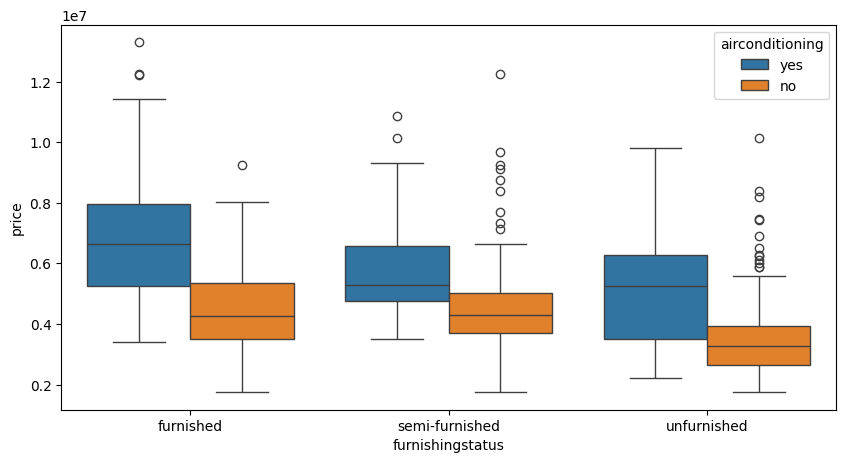

In [10]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

## Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [11]:
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [12]:
housing[varlist] =housing[varlist].apply(lambda x: x.map({'yes':1, 'no':0}))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Dummy Variables
The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.


In [13]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'

status = pd.get_dummies(housing.furnishingstatus).astype(int)

# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where —

    00 will correspond to furnished
    
    01 will correspond to unfurnished
    
    10 will correspond to semi-furnished

In [14]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(housing.furnishingstatus, drop_first=True).astype(int)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [15]:
# Add the results to the original housing dataframe
housing = pd.concat([housing,status], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [16]:
# Drop 'furnishingstatus' as we have created the dummies for it
housing.drop(['furnishingstatus'], inplace=True, axis=1)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [17]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

* Min-Max scaling (Normalization): between 0 and 1 (prefered as it takes care of outliers)
* Standardisation (mean-0, sigma-1)

  
This time, we will use MinMax scaling.
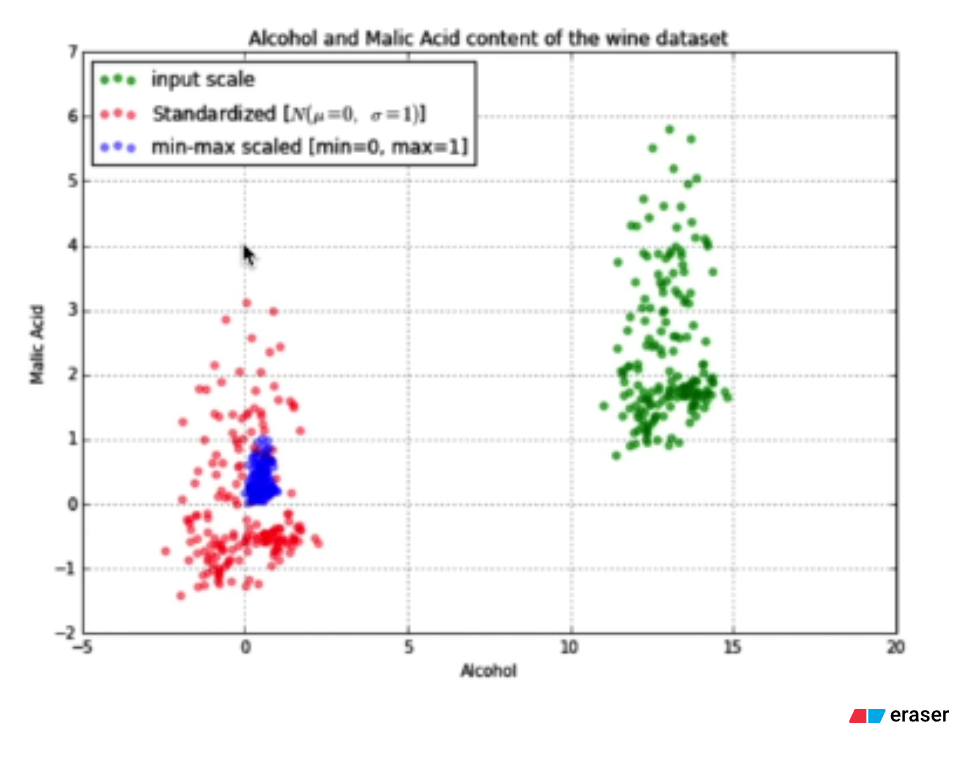

In [18]:
# x
# min max scaling or normalization = (x-xmin)/(xmax-xmin)
# standardization = (x-mu)/sigma

from sklearn.preprocessing import MinMaxScaler

#1. Instantiate an object
scaler  = MinMaxScaler()

#2. create list of numeric variable 

num_vars = ['area','bedrooms','bathrooms', 'stories','parking', 'price']

#3. Fit Data

#.fit() - learns xmin, xmax
#.transform() - calculates (x-xmin)/(xmax -xmin)
#.fit_transform()



#scaler.fit

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [19]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


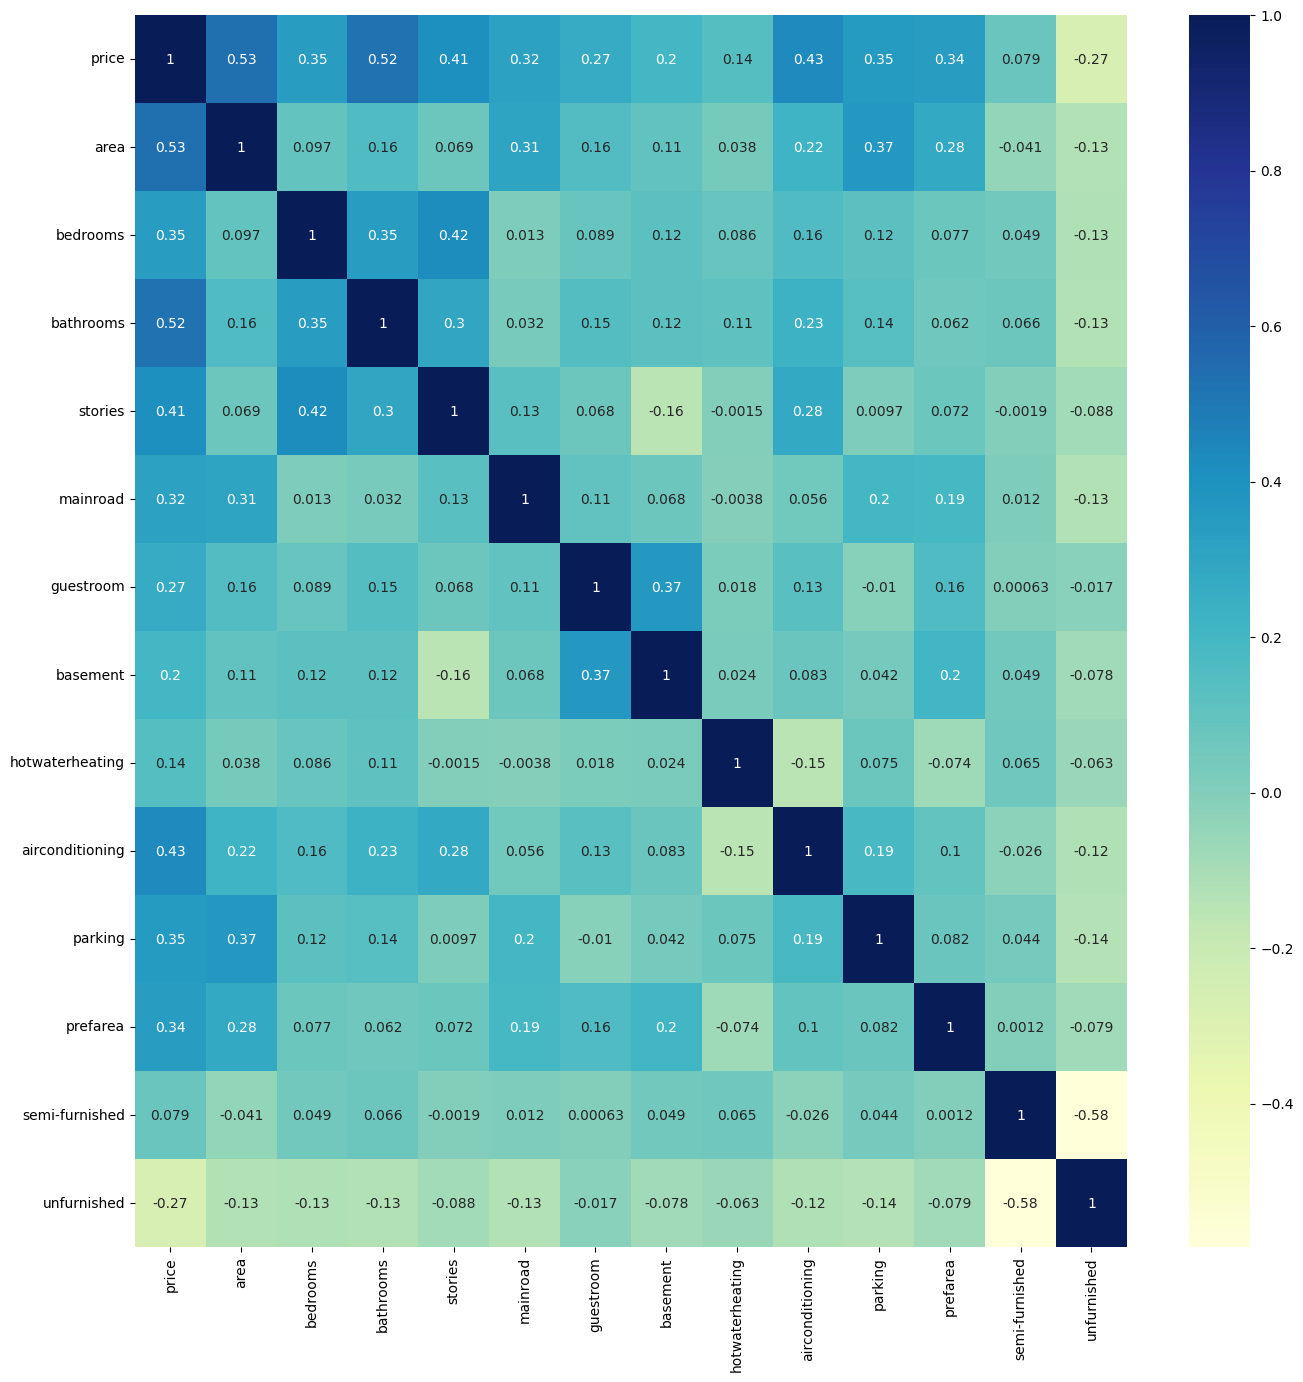

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(16,16))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True )
plt.show()

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

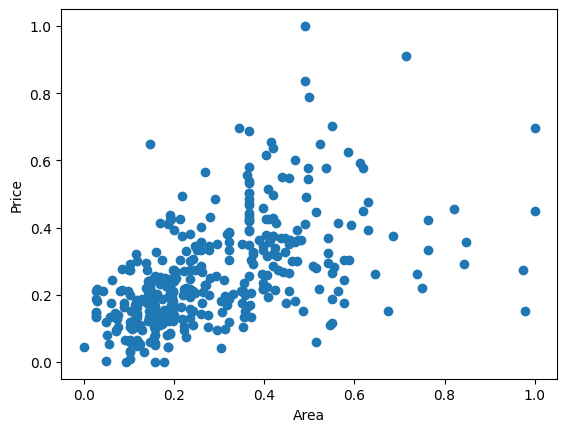

In [21]:
plt.scatter(df_train.area, df_train.price)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Dividing into X and Y sets for the model building

In [22]:
y_train = df_train.pop('price') # pop extracts the defined  colum from data frame and returns toi the variable , rest of the columns retained in the df

In [23]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [24]:
X_train = df_train #(df_train no has all cols except price as it has been poped outin line no 22)

## Step 5: Building a Multiple linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [25]:
# Build the model

#create the constant
X_train_sm = sm.add_constant(X_train[['area']])
lr=sm.OLS(y_train, X_train_sm).fit()

In [26]:
# Check the parameters obtained
print(lr.params)

const    0.126894
area     0.462192
dtype: float64


In [27]:
print(X_train.shape)
print(y_train.shape)

(381, 13)
(381,)


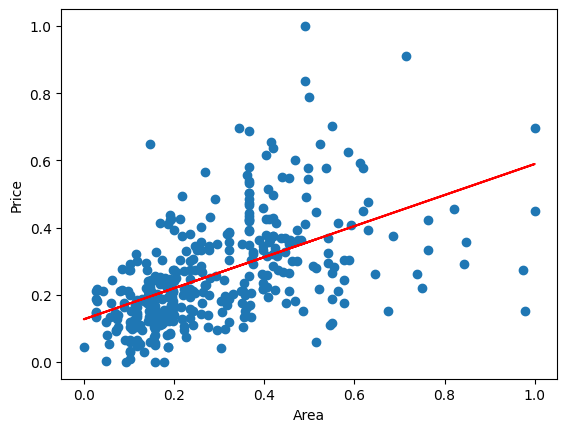

In [28]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_sm.area, y_train)
plt.plot(X_train_sm.area, 0.1269 + 0.4622 * X_train_sm.area, 'r')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [29]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           3.15e-29
Time:                        19:19:16   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

### Adding variable Process

The R-squared value obtained is `0.283`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `bathrooms`.

In [30]:
# add bathroom variable

#create the constant
X_train_sm = sm.add_constant(X_train[['area','bathrooms']])
lr=sm.OLS(y_train, X_train_sm).fit()
lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [31]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           2.51e-54
Time:                        19:19:16   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to 0.477 from 0.281. Let's go ahead and add another variable, bedrooms.

In [32]:
# add bedroom variable

#create the constant
X_train_sm = sm.add_constant(X_train[['area','bathrooms','bedrooms']])
lr=sm.OLS(y_train, X_train_sm).fit()
lr.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [33]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           3.12e-57
Time:                        19:19:16   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

### Removing variable process

In [34]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [35]:
#build model with all variables


X_train_sm = sm.add_constant(X_train)
lr=sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           8.83e-83
Time:                        19:19:16   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

In [36]:
#significance (p-values)
#VIF - covarience

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

 $ VIF_i = \frac{1}{1 - {R_i}^2} $

### What to Do if VIF is High?
1. Dropping variables
    * Drop the variable which is highly correlated with others
    * VIF < 5 is desirable
    * Pick the business interpretable variable
2. Create new variableusing the interactions of the older variables
    * Add interaction features, i.e. features derived using some of the original features
3. Variable transformations
    * Principal Component Analysis (covered in a later module)
  
Additional Reading

[Partial Least Squares (PLS)](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/partial-least-squares-regression/what-is-partial-least-squares-regression/)

### Rules for Variable Removal  ?
**We could have:**

    - High p-value, high VIF: remove
    - High-low:
        - High p, low VIF: remove these first
        - Low p, high VIF: remove these after the ones above
    - Low p, low VIF : retain

which variable to drop how to decide?

REMOVE FIRST     - High p, low VIF: remove these first AND rebuild model again repete
    - Low p, high VIF: remove these after the ones above

In [37]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['vif']= round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending=False)
vif

,features,vif
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

#### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, semi-furnished as it has a very high p-value of 0.938. Let's go ahead and drop this variables

In [38]:
X = X_train.drop('semi-furnished', axis= 1)
# Build a third fitted model
X_train_sm = sm.add_constant(X)
lr_2 = sm.OLS(y_train,X_train_sm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.07e-83
Time:                        19:19:16   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif', ascending=False)
vif

,Features,vif
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `bedroom` has a significantly high VIF (`6.6`) and a high p-value (`0.206`) as well. Hence, this variable isn't of much use and should be dropped.

In [40]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('bedrooms', axis=1)

In [41]:
# build second fitted model

X_train_sm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_sm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           2.73e-84
Time:                        19:19:16   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif', ascending=False)
vif

,Features,vif
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


### Dropping the variable and updating the model

As you might have noticed, dropping semi-furnised decreased the VIF of mainroad as well such that it is now under 5. But from the summary, we can still see some of them have a high p-value. basement for instance, has a p-value of 0.03. We should drop this variable as well.

In [43]:
X = X.drop('basement', axis=1)

# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           3.13e-84
Time:                        19:19:16   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

In [44]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.


## Step 7: Residual Analysis of the train data

Before making the predictions, you need to be certain that the model is reliable. To that end, you need to first perform a residual analysis of the error terms and then move on to making the predictions on the test set; and finally, evaluate the model based on the predictions.

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

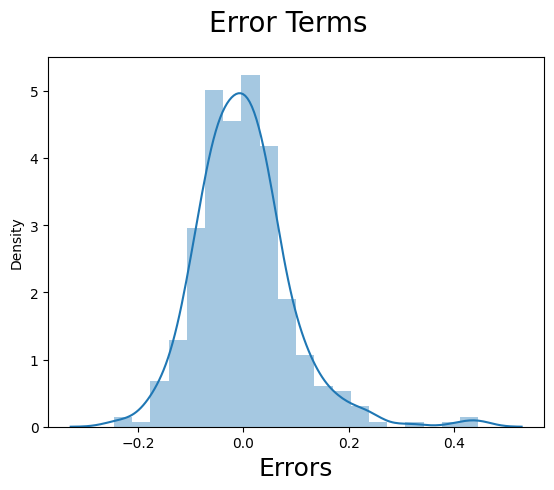

In [45]:
y_train_pred = lr_4.predict(X_train_lm)

#Plot the histogram of the error term
fig = plt.figure()
sns.distplot(y_train-y_train_pred, bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

since the distribution is centered around the 0 point the distribution is normal

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [46]:
num_vars = ['area','bedrooms','bathrooms', 'stories','parking', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [47]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [48]:
y_test = df_test.pop('price')
x_test = df_test

In [49]:
# Adding constant variable to test dataframe
x_test_sm = sm.add_constant(x_test)

In [50]:
# Creating x_test_sm dataframe by dropping variables from x_test_sm

x_test_sm = x_test_sm.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

In [59]:
# Making predictions using the fourth model

y_test_pred =lr_4.predict(x_test_sm)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

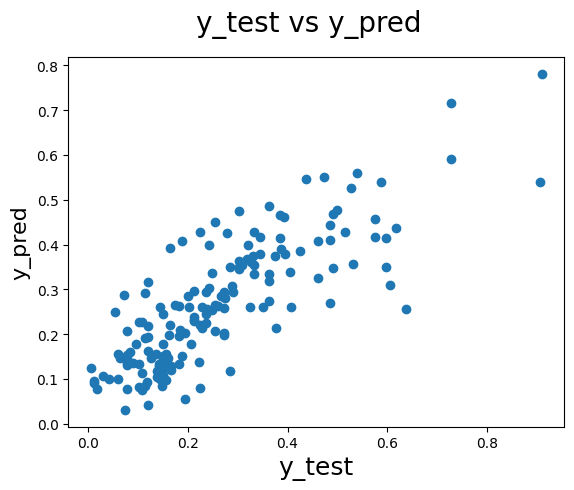

In [60]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [61]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_test_pred)

0.660134403021964

$𝑝𝑟𝑖𝑐𝑒=0.236×𝑎𝑟𝑒𝑎+0.202×𝑏𝑎𝑡ℎ𝑟𝑜𝑜𝑚𝑠+0.11×𝑠𝑡𝑜𝑟𝑖𝑒𝑠+0.05×𝑚𝑎𝑖𝑛𝑟𝑜𝑎𝑑+0.04×𝑔𝑢𝑒𝑠𝑡𝑟𝑜𝑜𝑚+0.0876×ℎ𝑜𝑡𝑤𝑎𝑡𝑒𝑟ℎ𝑒𝑎𝑡𝑖𝑛𝑔+0.0682×𝑎𝑖𝑟𝑐𝑜𝑛𝑑𝑖𝑡𝑖𝑜𝑛𝑖𝑛𝑔+0.0629×𝑝𝑎𝑟𝑘𝑖𝑛𝑔+0.0637×𝑝𝑟𝑒𝑓𝑎𝑟𝑒𝑎−0.0337×𝑢𝑛𝑓𝑢𝑟𝑛𝑖𝑠ℎ𝑒𝑑+0.0428 $

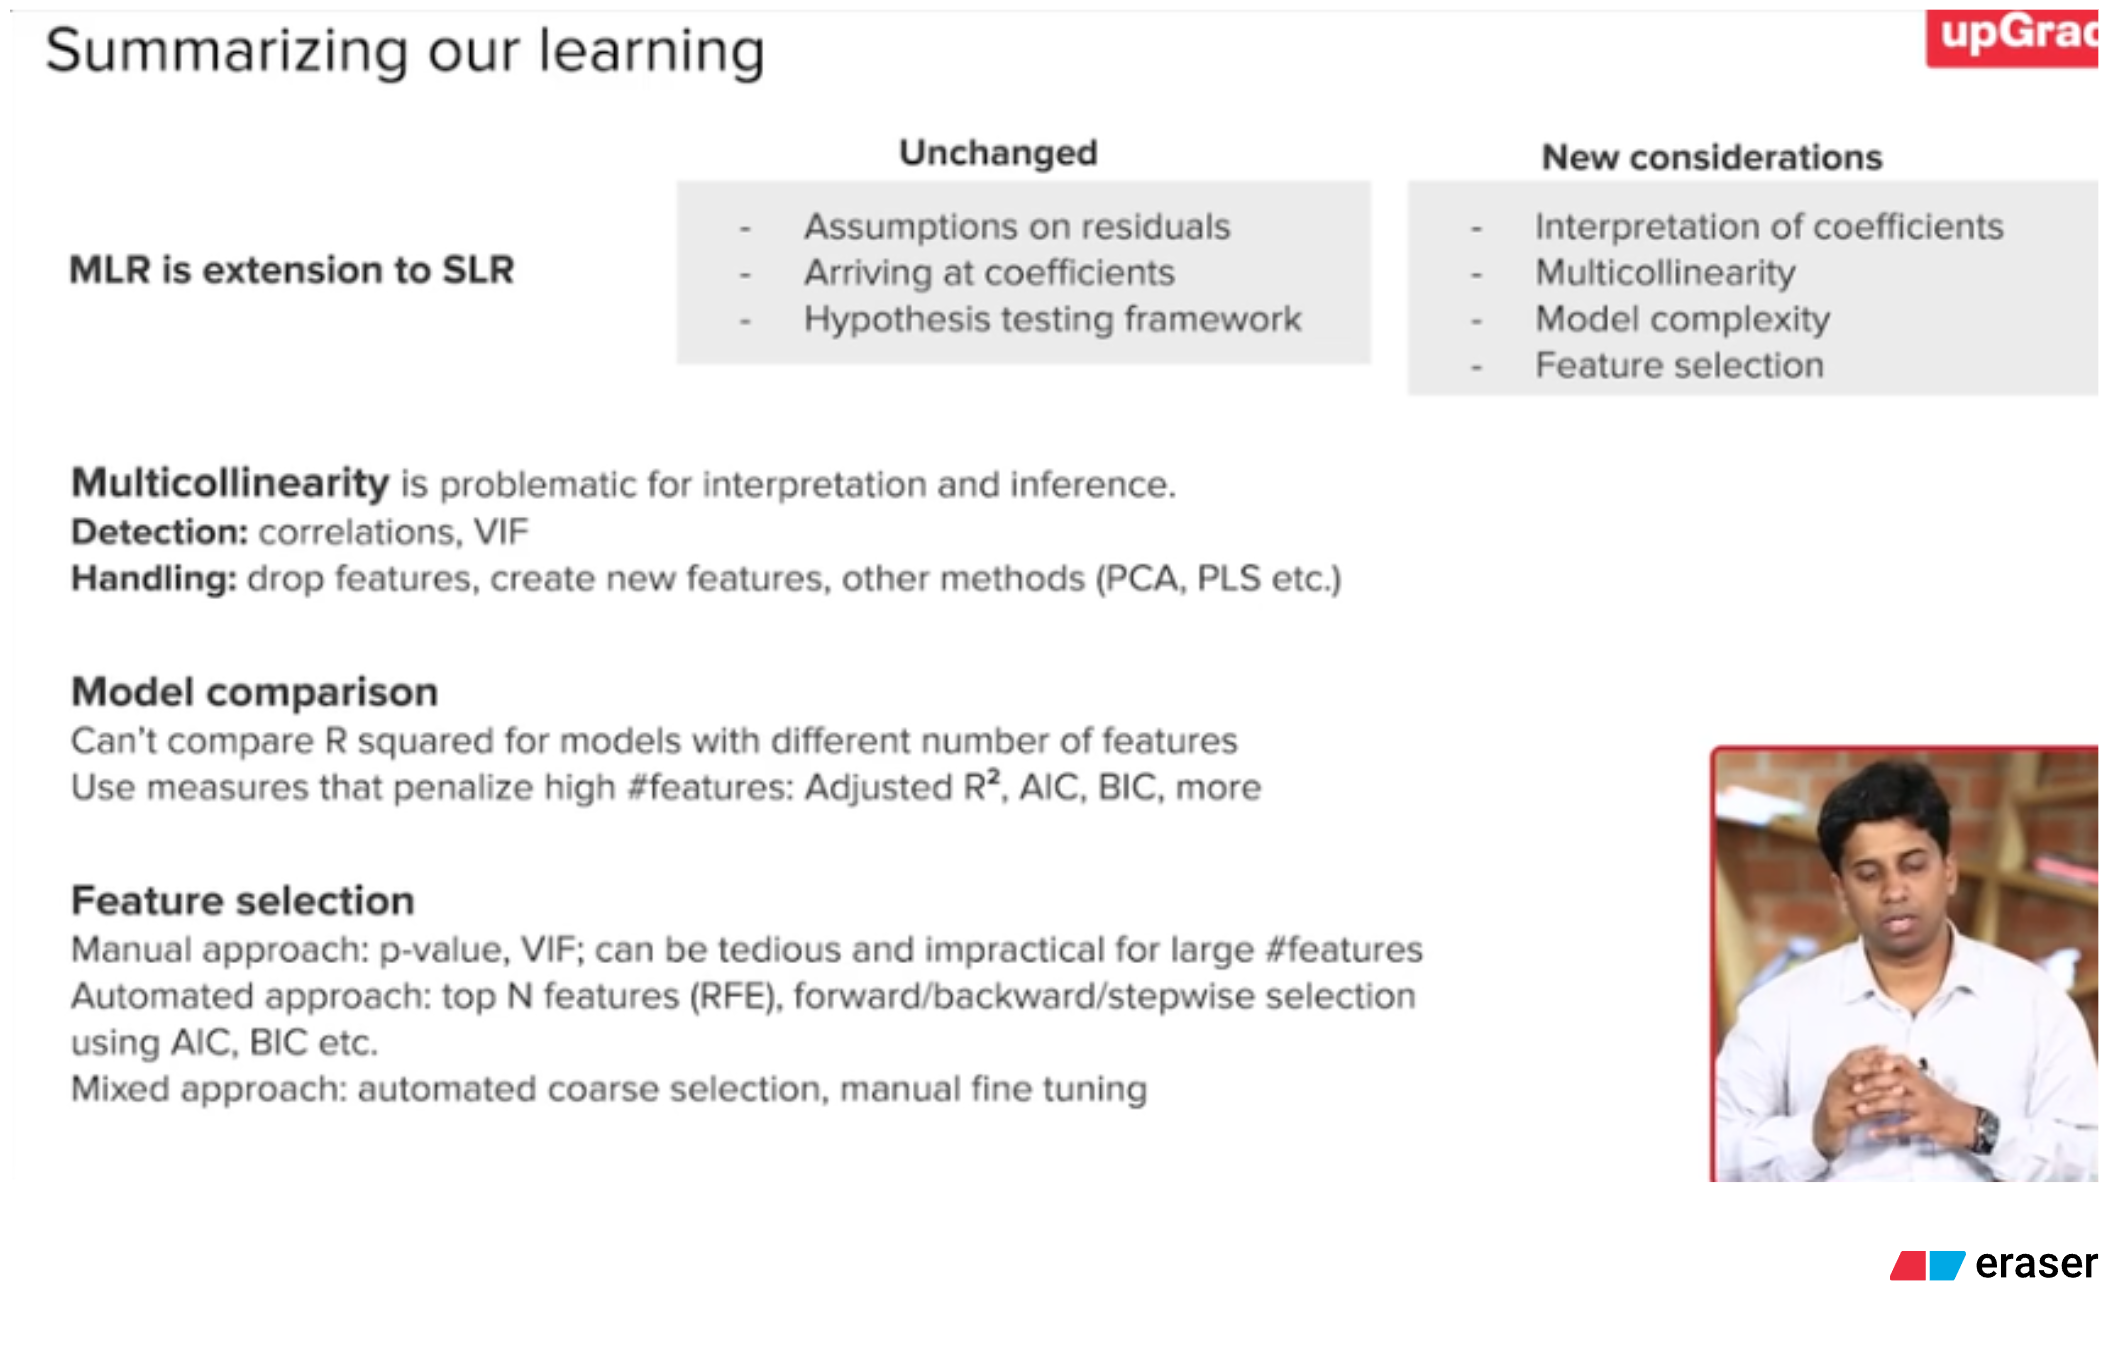

# Q1:Suppose the VIFs obtained for five different variables are as follows:

    X1	7.12
    X2	5.53
    X3	5.01
    X4	3.45
    X5	2.68



Assuming that you’re dropping variables only on the basis of VIF and a VIF > 5 is not acceptable, which of these variables will you definitely drop?

 - [x] X1
 - [ ] X2
 - [ ] X1 and X2
 - [ ] X1, X2, and X3

Answer: x1

Correct. It is always advisable that you drop variables one by one. Now, this variable definitely has a high VIF and needs to be dropped. The other two variables X2 and X3 also have a VIF > 5, but it might happen that after you drop X1, their VIF values will drop. So never drop more than one variable at a time.


# Q2: You performed RFE on a dataset to select 10 out of a total of 13 features. Following is the output for the 13 features you get on performing the RFE:



But now, you decided that you want 11 features in the model. Clearly, you need not run the RFE code again; you can simply use the above output. So based on the above output, which of the features will you eliminate?

- [ ] unfurnished and basement
- [ ] unfurnished and semi-furnished
- [ ] basement and semi-furnished

Answer: basement and semi-furnished

The numbers beside the variables indicate the importance of that variable. As you can see, 'unfurnished' has the number 2, and 'basement' and 'semifurnished' are 3 and 4 respectively. So if you want to retain 11 features, you will eliminate 'basement' and 'semifurnished'.

# Q2: In regression analysis, which of the statements is true?

- [x] The mean of residuals is always equal to zero.
- [ ] The mean of residuals is less than zero at all times.
- [ ] The sum of residuals is more than zero at all times
- [x] The sum of residuals is always equal to zero.

Answer: 

### ✅ Correct Statement:
**The sum of residuals is always equal to zero.**

---

### 📘 Explanation:

In **linear regression**, a residual is the difference between the actual value and the predicted value:

$
\text{Residual}_i = y_i - \hat{y}_i
$

Where:
$ y_i $ is the actual value of the dependent variable.
$ \hat{y}_i $ is the predicted value from the regression model.

In **Ordinary Least Squares (OLS)** regression, one of the fundamental properties is:
$
\sum_{i=1}^{n} (y_i - \hat{y}_i) = 0
$

This means:

- ✅ The **sum of residuals is always zero**.
- ✅ The **mean of residuals** is also zero in theory:

$
\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) = 0
$

However, in practical implementation due to numerical approximations, the mean may be a very small number close to zero (e.g., \(1 \times 10^{-16}\)).

---

### ❌ Incorrect Options:

- **"The mean of residuals is always equal to zero"**  
  - ❌ Not always numerically true (though theoretically valid).

- **"The mean of residuals is less than zero at all times"**  
  - ❌ False.

- **"The sum of residuals is more than zero at all times"**  
  - ❌ False.

---

### ✅ Summary:

- OLS regression minimizes the **sum of squared residuals**.
- As a result, the **sum of residuals** is **guaranteed to be zero**:
$
\sum_{i=1}^{n} e_i = \sum_{i=1}^{n} (y_i - \hat{y}_i) = 0
$



# Q3: Which of the following is incorrect about linear regression?

- [ ] Linear regression is very sensitive to data anomalies.
- [ ] Linear regression performs poorly when there are non-linear relationships.
- [ ] Linear regression guarantees interpolation but not extrapolation.
- [x] Linear regression assumes that the data points are not independent (i.e. One observation might be affected by another).

Answer: 

# Q4: State True or False:

Overfitting leads to a very high value of R-squared, which is misleading since the model is not actually a good predictor.

- [ ] True
- [ ] False

Answer: True

Overfitting causes the model to almost memorize the data. This reduces the distance between predicted and actual values in the training set. However, this could make the model less accurate on new data, i.e., the model memorises the data instead of recognizing the pattern that the data is following.

# Q5:Which of the following will help you in effectively comparing models (built on the same dataset) with different numbers of features?

- [ ] R-squared
- [x] R-squared-adjusted

Answer: R-squared-adjusted

R-squared does not take the number of features into account. It will always increase (or remain unchanged) with the number of features and may lead you to erroneously believe that the model with more features involved is better. R-squared is a good metric to compare models on the same data with the same number of features.

# Q6: Assume that a model has zero training error. i.e. it has completely memorised the training data(a case of overfitting). Which of the following statements is definitely true in this case:

- [ ] The prediction error on the test set cannot be zero

- [ ] The prediction error on the test set will always be very high

- [x] None of the above

Answer: None of the above

Due to overfitting, it is highly likely that you will have high prediction error on the test set. This would be the case more often than not. But there can be exceptions hence such a statement cannot be made for sure. 

# Q7: Consider the following dataset:

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Consider that the categorical column/variable has missing values, which metric would you impute the missing values with?

- [ ] Mean

- [ ] Median

- [x] Mode

Answer: Mode 

Categorical values are generally imputed with the mode as it represents the value that is the most common for the given column. 

# Graded Questions - Assessment 1

Suppose you're trying to predict the gross collection of a movie based on the following five factors: 'Budget', 'Average Critic Score', 'Facebook Likes', 'Number of Tweets', and 'Number of Screens'.

You obtained the following p-values for the five variables after fitting a regression line. Assuming you're only using p-value as a criteria to drop the variables and a p-value > 0.05 is not acceptable, which of these variables do you think is not significant in the prediction of gross collections and should be definitely dropped? Only one option is correct.

Budget	0.03
Average Critic Review	0.21
Facebook Likes	0.11
Number of Tweets	0.32
Number of Screens	0.01
 

- [X] Number of Tweets

- [X] Number of Tweets, Average Critic Review

- [X] Number of Tweets, Facebook Likes

- [X] Number of Screens

**Answer: **

A variable is considered statistically significant if its p-value < 0.05.

Variables with p-value > 0.05 are not statistically significant and can be candidates for removal.

Since the question says:
    “Only one option is correct”
    
    and asks which should be definitely dropped,
    
the best answer is the variable with the highest p-value, i.e.:

Number of Tweets (p-value=0.32)


**Number of Tweets (p-value = 0.32)**

So, even though others (e.g. Facebook Likes, Critic Score) are also not significant at p > 0.05, Number of Tweets is the most insignificant among them.

# Graded Questions - Assessment 2


Which of the following is/are true regarding the scaling of variables? More than one option(s) may be correct.

- [ ] Scaling should be done before the test-train split.

- [ ] Scaling should be done after the test-train split.

- [ ] Standardised scaling will affect the values of dummy variables but MinMax scaling will not.

- [ ] MinMax scaling will affect the values of dummy variables but standardized scaling will not.

**Answer: **

Of the options provided, the following two statements are true:

* Scaling should be done **after** the test-train split.
* **Standardised scaling** will affect the values of dummy variables but **MinMax scaling** will not.

---
 Explanation

 **Timing of Scaling ⏱️**

You should always split your data into training and testing sets **before** applying any scaling.

If you scale the entire dataset first, the scaler learns the statistical properties (like the mean or min/max) from the *entire* dataset, including the test set. This is a form of **data leakage**, where information from the test data "leaks" into your training process. It can make your model's performance look better than it actually is because it has already "seen" the data it's being tested on.

The correct process is:
1.  **Split** the data into a training set and a testing set.
2.  **Fit** the scaler on the **training data only** to learn the scaling parameters.
3.  **Transform** both the training and testing sets using the fitted scaler.

 **Effect on Dummy Variables 🔢**

Dummy variables are used to represent categorical data and typically have values of 0 or 1.

* **Standardized Scaling** ($z = \frac{x - \mu}{\sigma}$) changes these values because it subtracts the feature's mean and divides by its standard deviation. A column of 0s and 1s won't have a mean of 0 or a standard deviation of 1, so the original values will be transformed into new floating-point numbers.

* **MinMax Scaling** ($X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$) does **not** change dummy variables. For a dummy variable, the minimum is 0 and the maximum is 1. Plugging these into the formula shows that 0 remains 0 and 1 remains 1.

# Graded Questions - Assessment 3

Consider you are performing multiple linear regression where X1 and X2 are independent variables and Y is the dependent variable. What can you say about the coefficient of X1 and value of y in the regression equation? 

Equation

- [ ] The predicted value of Y increases by Equation for a unit increase in X1, irrespective of a change in X2.

- [ ] The predicted value of Y increases by Equation for a unit increase in X1, given X2 does not change.

- [ ] The predicted value of Y is Equation when X1=1.

- [ ] The predicted value of Y is X2 when X1=0.

Answer

Let's break this down carefully.

---

 ⚙️ **Multiple Linear Regression Equation**:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \varepsilon
$$

Where:

* $Y$ = predicted dependent variable
* $X_1, X_2$ = independent variables
* $\beta_1$ = coefficient of $X_1$
* $\beta_2$ = coefficient of $X_2$
* $\varepsilon$ = error term

---

 🧠 Interpretation of $\beta_1$:

> **"The predicted value of Y increases by $\beta_1$ units for every one-unit increase in $X_1$, assuming all other variables (like $X_2$) remain constant."**

This is a **key property of multiple linear regression** — each coefficient represents the **marginal effect** of its variable **holding all others constant**.

---

 ✅ Now Evaluate the Options:

---

 ✅ **Option 1**:

**"The predicted value of Y increases by Equation for a unit increase in X1, irrespective of a change in X2."**
❌ **Incorrect**

* It **ignores** the effect of $X_2$ — misleading.
* Coefficients are interpreted **only when holding other variables constant**.

---

 ✅ **Option 2**:

**"The predicted value of Y increases by Equation for a unit increase in X1, given X2 does not change."**
✅ **Correct**

* This is the **correct interpretation** of $\beta_1$ in multiple linear regression.
* "Given $X_2$ does not change" means **holding it constant**.

---

 ✅ **Option 3**:

**"The predicted value of Y is Equation when X1 = 1."**
❌ **Incorrect**

* You **cannot predict Y** just by knowing $X_1 = 1$ — you also need values for $X_2$ and $\beta_0$.

---

 ✅ **Option 4**:

**"The predicted value of Y is X2 when X1 = 0."**
❌ **Incorrect**

* This is a **nonsensical statement** unless $\beta_0 = 0$, $\beta_2 = 1$, and error is 0 — which we don’t know.

---

 ✅ Final Answer:

> **The predicted value of Y increases by Equation for a unit increase in X1, given X2 does not change.**

Let me know if you want the math illustrated with an example.


# Graded Questions - Assessment 4

In the R-squared Adjusted metric, R-squared is “adjusted” or modified according to:

- [ ] Number of predictors

- [ ] Sample size

- [ ] Values of the target variable

- [ ] All of the above

Answer: In the Adjusted R-squared metric, the standard R-squared is adjusted according to the Number of predictors and the Sample size.





 
![Adjusted R](https://latex.upgrad.com/render?formula=R%5E%7B2%7D%20%3D%201%20-%20%5Cfrac%7B%5Cleft%28%5Cright.%201%20-%20R%5E%7B2%7D%20%5Cleft.%5Cright%29%20%5Cleft%28%5Cright.%20N%20-%201%20%5Cleft.%5Cright%29%7D%7BN%20-%20p%20-%201%7D)



Here, **n**: is the sample size meaning the number of rows you'd have in the dataset and **p**: is the number of predictor variables.
